In [4]:
import numpy as np
from scipy.stats import *
from scipy.special import *
from itertools import *
from more_itertools import *
import sympy as sp
import math
import statistics as statsv
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from tqdm.notebook import tqdm
import functools as ft
#########################
import locale
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
#########
#########
plt.rcParams['font.size'] = 36
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'cm'
###################
sp.init_printing(use_unicode=True,use_latex=True)

# 9.1

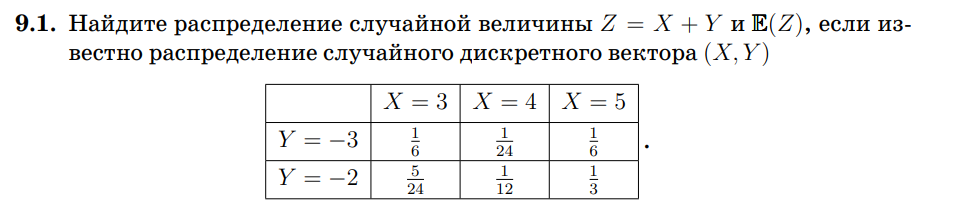

In [5]:
z={0:(3,-3),1:(4,-3),2:(5,-3),3:(3,-2),4:(4,-2),5:(5,-2)}
vl = {0:1/6,1:1/24,2:1/6,3:5/24,4:1/12,5:1/3}

In [6]:
Z=rv_discrete(values=(list(z),list(vl.values())))

In [10]:
N=100000000
sum(sum(z[i]) for i in Z.rvs(size=N))/N

# 9.2

In [11]:
z={0:(3,-2),1:(4,-2),2:(5,-2),3:(3,-1),4:(4,-1),5:(5,-1)}
vl = {0:1/4,1:1/6,2:1/8,3:1/8,4:1/4,5:1/12}

In [12]:
Z=rv_discrete(values=(list(z),list(vl.values())))

In [13]:
N=100000000
sum(min([6,z[i][0]-z[i][1]]) for i in Z.rvs(size=N))/N

# 9.3

In [33]:
z={0:(-1,-1),1:(0,-1),2:(1,-1),3:(-1,0),4:(0,0),5:(1,0)}
vl = {0:1/28,1:3/14,2:1/28,3:3/14,4:13/28,5:1/28}

In [34]:
Z=rv_discrete(values=(list(z),list(vl.values())))

## A

In [35]:
N=1000000
xl = np.array([z[i][0]*z[i][1] for i in Z.rvs(size=N)])
a = sum(xl!=0)/N
a

In [36]:
1/14

## B

In [37]:
N=1000000
xl = np.array([z[i][0]+z[i][1] for i in Z.rvs(size=N)])
b = sum(xl==0)/N
b

In [38]:
1/2

## AB

In [39]:
N=1000000
xl = np.array([((z[i][0]+z[i][1])==0 and (z[i][0]*z[i][1])!=0) for i in Z.rvs(size=N)])
ab = sum(xl==1)/N
ab

In [40]:
1/28

# 9.4

In [68]:
z = [1,2,3,4,5,6]
pz=np.full(6,1/6)
Z=rv_discrete(values=(z,pz))

In [78]:
N=10000
xl = np.array([i+j for i in tqdm(Z.rvs(size=N)) for j in Z.rvs(size=N)])
a = sum(xl%2==0)/N**2
X=rv_discrete(values=([0,1],[1-a,a]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [79]:
N=10000
xl = np.array([i*j for i in tqdm(Z.rvs(size=N)) for j in Z.rvs(size=N)])
b = sum(xl%2==0)/N**2
Y=rv_discrete(values=([0,1],[1-b,b]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [83]:
a,b,X.var(),Y.var()

In [85]:
Covxy=1/4 - a*b
Covxy

In [90]:
K = np.matrix([[X.var(),Covxy],[Covxy,Y.var()]])
K

matrix([[ 0.24999999, -0.12498489],
        [-0.12498489,  0.18757691]])

In [92]:
np.linalg.det(K)

# 9.5

In [94]:
n = sp.symbols('n')

In [ ]:
A = rv_discrete(values=([0,1],[0.6,0.4]))
B = rv_discrete(values=([0,1],[0.4,0.6]))
AB =  rv_discrete(values=([0,1],[0.8,0.2]))

## Без n

In [99]:
Covab= AB.expect() - A.expect()*B.expect()
Covab

In [100]:
sigmas=(A.var()*B.var())**0.5
sigmas

In [102]:
Covab/sigmas

## С n

In [95]:
Covabn= AB.expect()*n - A.expect()*B.expect()*n**2
Covabn

In [96]:
sigmasn=(A.var()*B.var()*n**2)**0.5
sigmasn

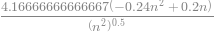

In [97]:
Covabn/sigmasn

# 9.6

In [139]:
x = np.arange(start=1,stop=7)
px=np.array([1/21 * i for i in x ])

X = rv_discrete(values=(x,px))

In [140]:
yn = np.arange(2)
pyn = np.array([sum(px[np.where(x%len(yn)==i)]) for i in yn])

Y2 = rv_discrete(values=(yn,pyn))

In [141]:
yn = np.arange(3)
pyn = np.array([sum(px[np.where(x%len(yn)==i)]) for i in yn])

Y3 = rv_discrete(values=(yn,pyn))

In [142]:
Y2.expect(),Y2.var(),Y3.expect(),Y3.var()

In [143]:
Y2Y3=rv_discrete(values=([0,1,2],[15/21,1/21,5/21]))

In [144]:
CovY2Y3 = Y2Y3.expect() - Y2.expect()*Y3.expect()

In [146]:
sigmas = (Y2.var()*Y3.var())**0.5
CovY2Y3/sigmas , 5/249**0.5